In [1]:
import numpy as np
import pandas as pd

from utils.timeutil import YearMonth

hst = pd.read_csv(".cache/historical_data.csv", dtype={"code": str})
hst["매수년월"] = hst["매수년월"].apply(lambda x: YearMonth.from_string(x))
hst["매도년월"] = hst["매도년월"].apply(lambda x: YearMonth.from_string(x))
hst = hst[hst["확정실적"].notna()]

In [2]:
# RECIPE ==========================================================

recipes = {
    "벨류": {
        "GP/P": 0.120550,
        "EQ/P": 0.105678,
    },
    "성장": {
        "O_QoQ": 0.027,
        "E_QoQ": 0.024,
        "EBT_QoQ": 0.017,
        "O/A_QoQ": 0.013,
        "E/EQ_QoQ": 0.011,
        "O/EQ_QoQ": 0.01,
        "E/A_QoQ": 0.009,
        "EBT/A_QoQ": 0.008,
        "EBT/EQ_QoQ": 0.006,
        "GP/EQ_QoQ": 0.004,
        "GP/A_QoQ": 0.004,
        "GP_QoQ": 0.003,
        "R_QoQ": 0.001,
        "R/EQ_QoQ": 0.001,
        "R/A_QoQ": 0.001,
    },
    "가격": {
        "P": -1
    },
    "전략1": {
        "가격": 1,
        "벨류": 1,
        "성장": 1
    },
    "퀄리티": {
        "O/EQ": 5,
        "EBT/EQ": 4,
        "E/EQ": 3,
    },
    "성장2": {
        "O_QoQ": 2,
        "EBT_QoQ": 1,
    },
    "전략2": {
        "퀄리티": 2,
        "성장2": 1,
        "O/P": 1
    },
    "전략": {
        "전략1": 1,
        "전략2": 2,
    }
}

# =================================================================

pct_scale = 100
for title, recipe in recipes.items():
    # Calculate recipe
    hst[title] = hst.apply(lambda row: sum([row[f"{k}_pct"] * w for k, w in recipe.items()]), axis=1)

    # Calculate pct
    rank = hst.groupby("매도년월")[title].apply(lambda x: np.ceil(x.rank(pct=True) * pct_scale))
    hst[f"{title}_pct"] = rank.reset_index(level=0, drop=True)

hst

,code,매수년월,매도년월,종목명,매수일,매수가,P,vol,val,shares,...,전략1,전략1_pct,퀄리티,퀄리티_pct,성장2,성장2_pct,전략2,전략2_pct,전략,전략_pct
0,000020,2023-01,2023-02,동화약품,2023-01-31,9380.0,2.619972e+11,1730269.0,1.616176e+10,27931470.0,...,198.0,82.0,721.0,61.0,249.0,85.0,280.0,75.0,232.0,85.0
1,000040,2023-01,2023-02,KR모터스,2023-01-31,531.0,5.104952e+10,3343710.0,1.824473e+09,96138465.0,...,159.0,56.0,113.0,9.0,30.0,7.0,32.0,3.0,62.0,14.0
2,000050,2023-01,2023-02,경방,2023-01-31,10700.0,2.933434e+11,135064.0,1.437697e+09,27415270.0,...,132.0,36.0,517.0,42.0,52.0,14.0,182.0,42.0,120.0,35.0
3,000070,2023-01,2023-02,삼양홀딩스,2023-01-31,71900.0,6.157711e+11,153368.0,1.073298e+10,8564271.0,...,126.0,31.0,605.0,50.0,65.0,18.0,209.0,50.0,131.0,40.0
4,000080,2023-01,2023-02,하이트진로,2023-01-31,26300.0,1.844514e+12,3929187.0,9.930246e+10,70133611.0,...,142.0,43.0,952.0,81.0,199.0,68.0,300.0,83.0,209.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37311,457550,2024-03,2024-04,우진엔텍,2024-03-29,25900.0,2.401277e+11,29071565.0,7.334011e+11,9271339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37314,460850,2024-03,2024-04,동국씨엠,2024-03-29,6350.0,1.898565e+11,1457421.0,9.323552e+09,29898656.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37315,460860,2024-03,2024-04,동국제강,2024-03-29,11260.0,5.585863e+11,3576343.0,4.168023e+10,49608017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37318,462520,2024-03,2024-04,조선내화,2024-03-29,17960.0,2.129188e+11,199995.0,3.623004e+09,11855168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def pnl_by_pct(factor: str): return (
    hst
    .groupby(["매도년월", f"{factor}_pct"])["수익률"]
    .mean()
    .to_frame()
    .reset_index()
    .pivot(index="매도년월", columns=f"{factor}_pct")
    .droplevel(level=0, axis=1)
)


def agg_by_pct(factor: str):
    """
    cagr, mdd by factor
    """
    df = pnl_by_pct(factor)
    years = df.index.min().duration(df.index.max())
    cum = (df + 1).cumprod()
    dd = cum / cum.cummax() - 1
    return pd.DataFrame({
        "cagr": (df + 1).prod() ** (1 / years) - 1,
        "mdd": dd.min(),
    })


returns_bm = hst.groupby("매도년월")["수익률"].mean()


def agg_by_month(factor: str, port_size: int):
    """
    """
    returns_top = (
        hst
        .groupby("매도년월")
        .apply(
            lambda x: x.nlargest(port_size, f"{factor}_pct")["수익률"].mean(),
            include_groups=False
        )
    )

    df = pnl_by_pct(factor)
    return pd.DataFrame({
        "port": returns_top,
        "bm": returns_bm,
        "perform": returns_top - returns_bm,
        "corr": df.apply(lambda x: x.corr(pd.Series(x.index)), axis=1),
    })


def calc_performance(factor: str):
    df = agg_by_pct(factor)
    corr = df.reset_index().corr("spearman").loc[f"{factor}_pct", "cagr"]
    coef, _ = np.polyfit(df.index, df["cagr"], 1)
    return pd.Series({
        "factor": factor,
        "corr": corr,
        "coef": coef,
        "power": corr * coef
    })


In [4]:
"""모든 팩터 성능 측정"""

all_factors = [col.split("_pct")[0] for col in hst.columns if col.endswith("_pct")]

(
    pd.Series(all_factors)
    .apply(calc_performance)
    .sort_values("power", ascending=False)
    .reset_index(drop=1)
)

,factor,corr,coef,power
0,수익률,1.000000,1.952103,1.952103e+00
1,전략2,0.586775,0.002608,1.530458e-03
2,EBT/EQ,0.595332,0.002418,1.439557e-03
3,추세1,0.554143,0.002545,1.410567e-03
4,퀄리티,0.549439,0.002516,1.382632e-03
5,O/EQ,0.480888,0.002392,1.150429e-03
6,EBT/A,0.509595,0.002217,1.129766e-03
7,전략,0.495962,0.002274,1.127835e-03
8,E/A,0.517096,0.002176,1.125391e-03
9,E/EQ,0.485653,0.002307,1.120183e-03


In [98]:
target_factor = "전략2"

전략2 CAGR 연관성:  0.5867746774677468


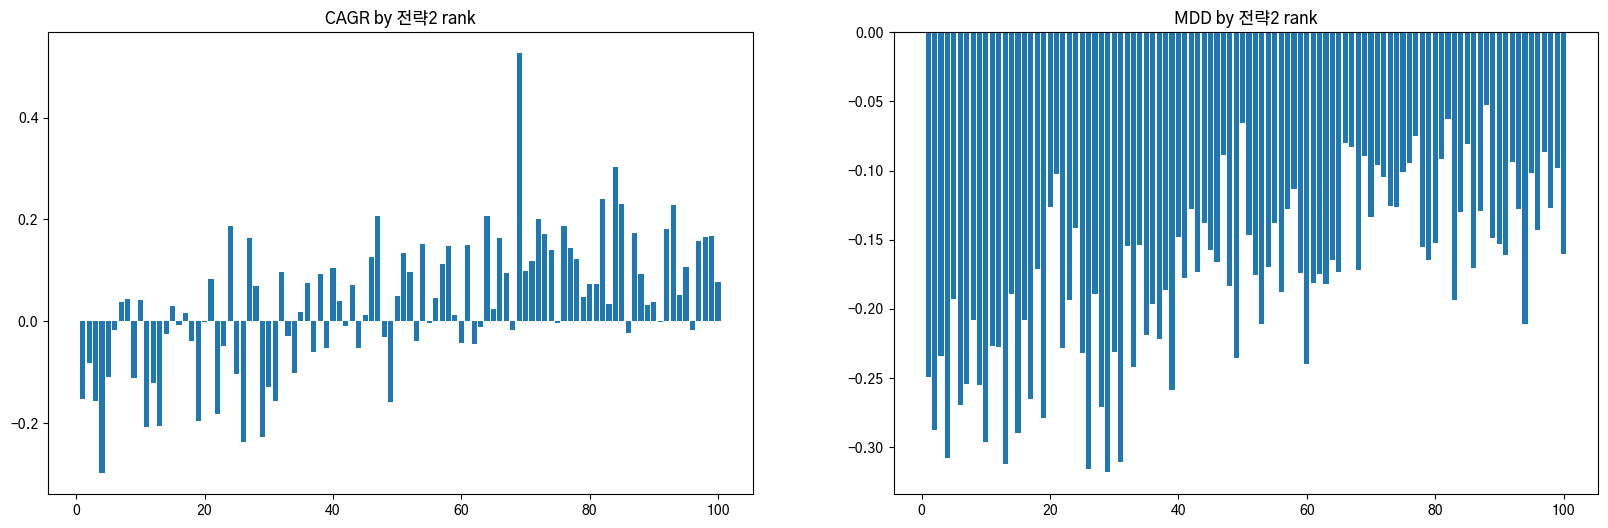

In [99]:
"""팩터 성능"""

import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '../res/font/Gothic_A1/GothicA1-Medium.ttf'
font_manager.fontManager.addfont(font_path)
font_name = font_manager.fontManager.ttflist[-1].name
plt.rc("font", family=font_name)
plt.rc('axes', unicode_minus=False)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
plt.rcParams['agg.path.chunksize'] = 10_000

agg = agg_by_pct(target_factor)

n_rows, n_cols = 1, 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figwidth(20), fig.set_figheight(6 * n_rows)

agg_cagr, agg_mdd = agg["cagr"], agg["mdd"]
axes[0].set_title(f"CAGR by {target_factor} rank")
axes[0].bar(agg.index, agg_cagr)

axes[1].set_title(f"MDD by {target_factor} rank")
axes[1].bar(agg.index, agg["mdd"])

print(
    f"{target_factor} CAGR 연관성: ",
    agg_cagr.reset_index().corr("spearman").loc[f"{target_factor}_pct", "cagr"]
)

기간 내 전략2 수익률:  0.16
기간 내 BM 수익률:  0.03
기간 내 연관성 변화 -0.075


,port,bm,perform,corr
매도년월,,,,
2023-02,0.026423,0.015507,0.010916,0.449432
2023-03,0.043203,0.015382,0.027821,0.163953
2023-04,-0.019097,-0.004016,-0.015082,-0.162277
2023-05,0.053452,0.036923,0.016529,-0.074760
2023-06,0.089322,0.010678,0.078645,0.521983
2023-07,-0.028564,-0.031269,0.002705,0.334426
2023-08,-0.029899,0.019210,-0.049109,-0.258378
2023-09,-0.026374,-0.058858,0.032483,0.535270
2023-10,-0.045216,-0.084643,0.039428,0.573127


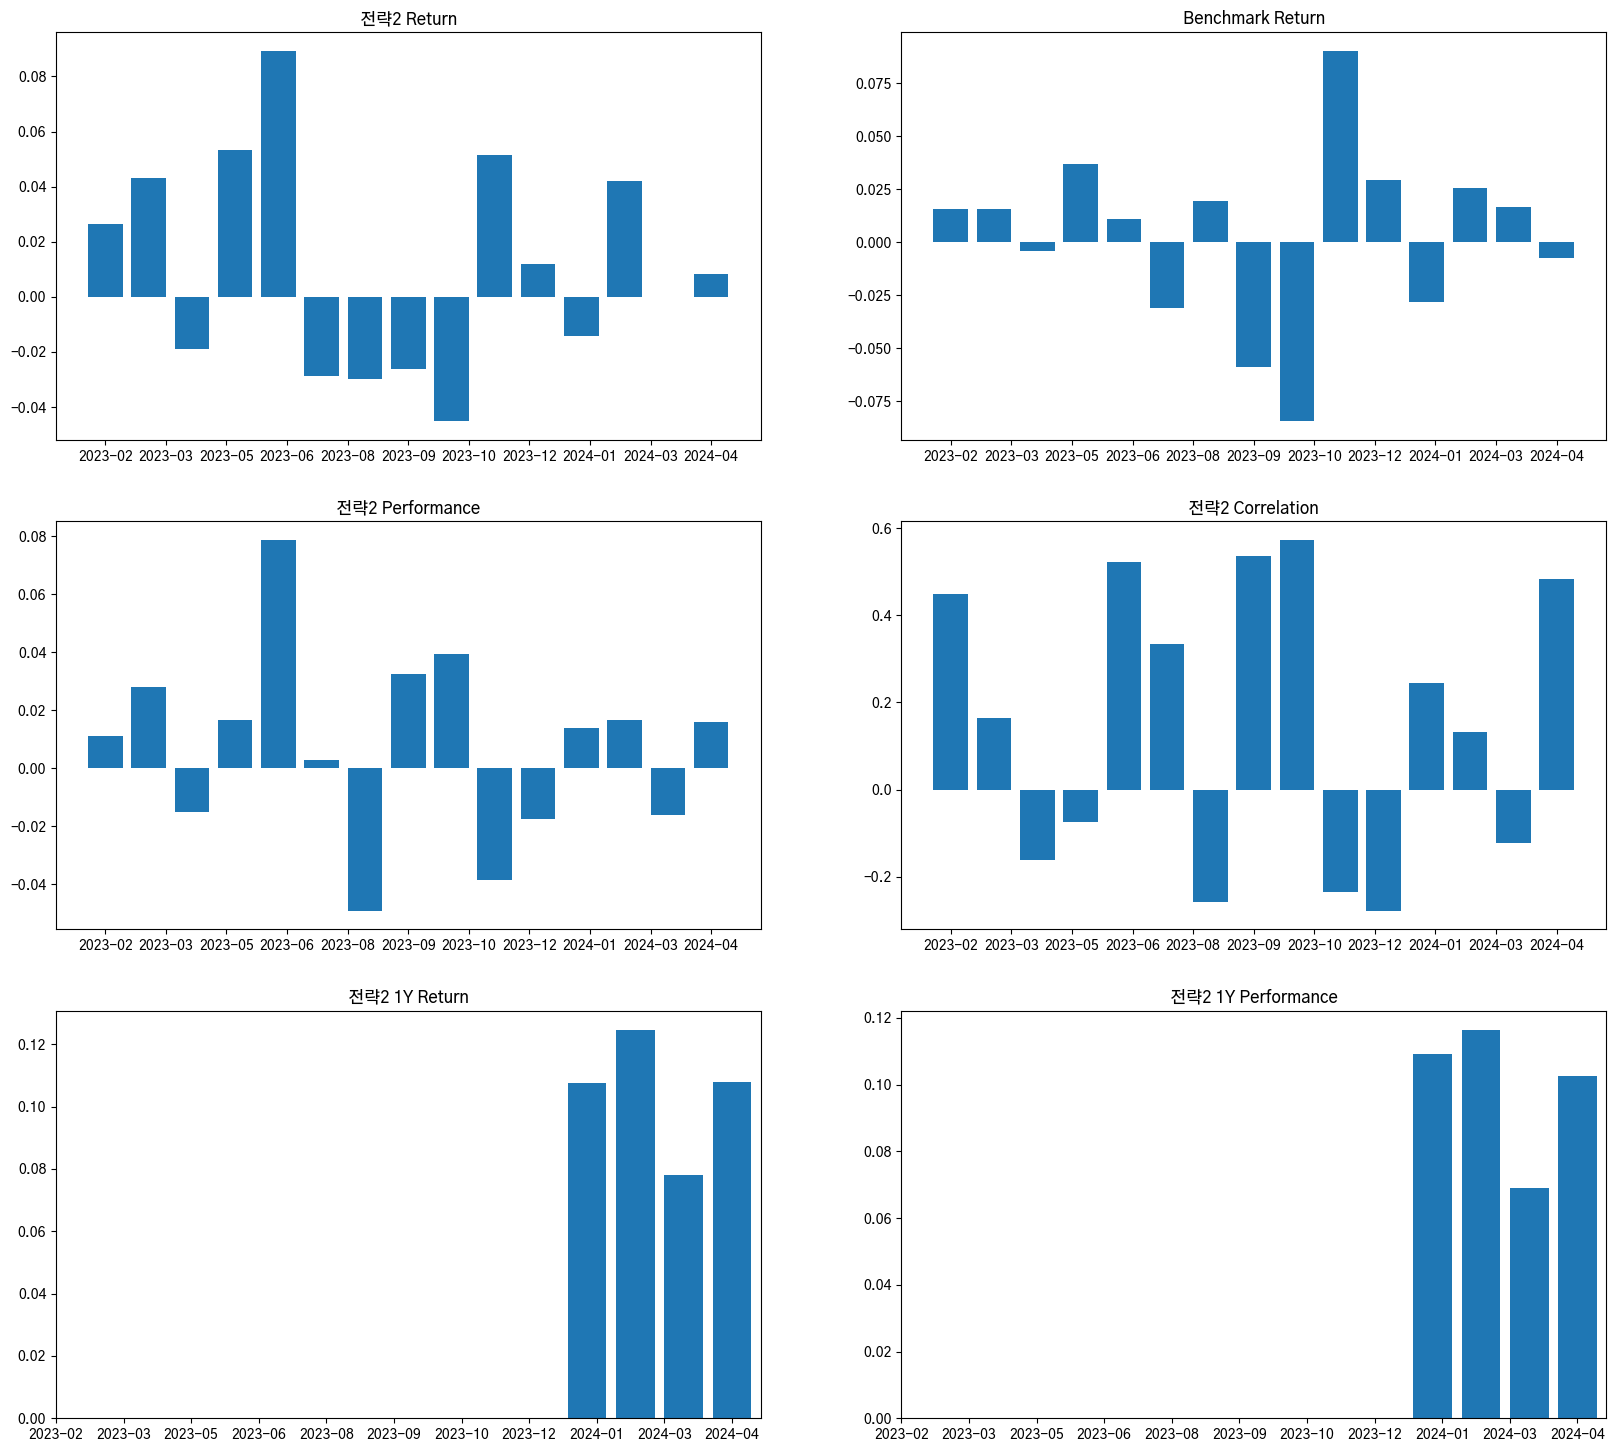

In [100]:
"""
월별 팩터 성능
"""

n_rows, n_cols = 3, 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figwidth(20), fig.set_figheight(6 * n_rows)

agg = agg_by_month(target_factor, 50)

x_ticks = np.quantile(np.arange(0, len(agg)), [1 * i / 10 for i in range(10)] + [1])
x_values = [str(x) for x in agg.index]

axes[0][0].set_title(f"{target_factor} Return")
axes[0][0].bar(x_values, agg["port"])
axes[0][0].set_xticks(x_ticks)

axes[0][1].set_title(f"Benchmark Return")
axes[0][1].bar(x_values, agg["bm"])
axes[0][1].set_xticks(x_ticks)

axes[1][0].set_title(f"{target_factor} Performance")
axes[1][0].bar(x_values, agg["perform"])
axes[1][0].set_xticks(x_ticks)

axes[1][1].set_title(f"{target_factor} Correlation")
axes[1][1].bar(x_values, agg["corr"])
axes[1][1].set_xticks(x_ticks)

# 전략 1년 누적 수익률
rolling_port = agg["port"].rolling(window=12).apply(lambda x: (x + 1).prod() - 1)
axes[2][0].set_title(f"{target_factor} 1Y Return")
axes[2][0].bar(x_values, rolling_port)
axes[2][0].set_xticks(x_ticks)

# 전략 1년 누적 성능
rolling_perform = rolling_port - agg["bm"].rolling(window=12).apply(lambda x: (x + 1).prod() - 1)
axes[2][1].set_title(f"{target_factor} 1Y Performance")
axes[2][1].bar(x_values, rolling_perform)
axes[2][1].set_xticks(x_ticks)

# round(df * 100, 2)
print(
    f"기간 내 {target_factor} 수익률: ",
    round((agg["port"] + 1).prod() - 1, 2)
)
print(
       f"기간 내 BM 수익률: ",
    round((agg["bm"] + 1).prod() - 1, 2)
)
print(
    "기간 내 연관성 변화", 
    round(agg.reset_index()["corr"].reset_index().corr("spearman").loc["index", "corr"], 3)
)

agg

In [101]:
# 월별 포트 구성
port = (
    hst
    .groupby("매도년월")
    .apply(lambda x: x.nlargest(50, f"{target_factor}_pct").sort_values("수익률", ascending=False), include_groups=False)
    .droplevel(level=1)
    [["code", "종목명", "매수일", "매도일", "수익률", "매수가", "매도가"] + [target_factor, f"{target_factor}_pct"]]
)
port.reset_index(drop=True).to_csv(".cache/port.csv")
port

,code,종목명,매수일,매도일,수익률,매수가,매도가,전략2,전략2_pct
매도년월,,,,,,,,,
2023-02,053060,세동,2023-01-31,2023-02-28,0.448425,1619.0,2345.0,382.0,100.0
2023-02,010780,아이에스동서,2023-01-31,2023-02-28,0.261494,34800.0,43900.0,358.0,98.0
2023-02,005010,휴스틸,2023-01-31,2023-02-28,0.235409,5140.0,6350.0,383.0,100.0
2023-02,008260,NI스틸,2023-01-31,2023-02-28,0.212302,5040.0,6110.0,374.0,100.0
2023-02,093520,매커스,2023-01-31,2023-02-28,0.190000,9000.0,10710.0,370.0,100.0
...,...,...,...,...,...,...,...,...,...
2024-04,215360,우리산업,2024-03-29,2024-04-30,-0.108657,16750.0,14930.0,356.0,98.0
2024-04,083310,엘오티베큠,2024-03-29,2024-04-30,-0.129870,23100.0,20100.0,361.0,99.0
2024-04,018310,삼목에스폼,2024-03-29,2024-04-30,-0.198778,24550.0,19670.0,384.0,100.0


In [102]:
pnl_by_code = port.groupby(["code", "종목명"]).agg(
    count=pd.NamedAgg(column="수익률", aggfunc="size"),
    평균수익률=pd.NamedAgg(column="수익률", aggfunc="mean"),
    누적수익률=pd.NamedAgg(column="수익률", aggfunc="mean")
)
pnl_by_code.to_csv(".cache/pnl_by_code.csv")
pnl_by_code

,,count,평균수익률,누적수익률
code,종목명,,,
000270,기아,10,0.029941,0.029941
000990,DB하이텍,3,0.145010,0.145010
001060,JW중외제약,2,-0.084490,-0.084490
001120,LX인터내셔널,3,-0.057252,-0.057252
001250,GS글로벌,1,-0.032362,-0.032362
...,...,...,...,...
322000,HD현대에너지솔루션,1,-0.023725,-0.023725
332370,아이디피,4,-0.055117,-0.055117
353200,대덕전자,3,0.006388,0.006388
